### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

In [67]:
font_path = "/System/Library/AssetsV2/com_apple_MobileAsset_Font7/cd59971ded42add9070aa2172265ba7fcf8d9327.asset/AssetData/BMKirangHaerang-Regular.otf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [68]:
df = pd.read_csv('/Users/uii/eda_practice/data/ecommerce_sales_data.csv', parse_dates=['OrderDate'])
print(df.head())

num = df.select_dtypes(include=['int64', 'float64']).columns
df[num] = df[num].fillna(df[num].median())

cols = df.select_dtypes(include=['object', 'category']).columns
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(f'데이터타입: {df.dtypes}')

df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
print(df['OrderDate'].dtype)

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

            OrderDate Country  DiscountRate  
0 2024-06-10 17:18:00      미국          0.14  
1 2023-11-18 18:45:00      독일          0.29  
2 2023-10-15 11:19:00      중국          0.23  
3 2024-07-19 02:19:00      일본          0.20  
4 2024-01-20 20:34:00    대한민국          0.09  
데이터타입: OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country     

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

/var/folders/05/fz3vjf312q31kc1qh7m8p_z40000gn/T/ipykernel_80899/6091780.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['TotalRevenue'].resample('M').sum()


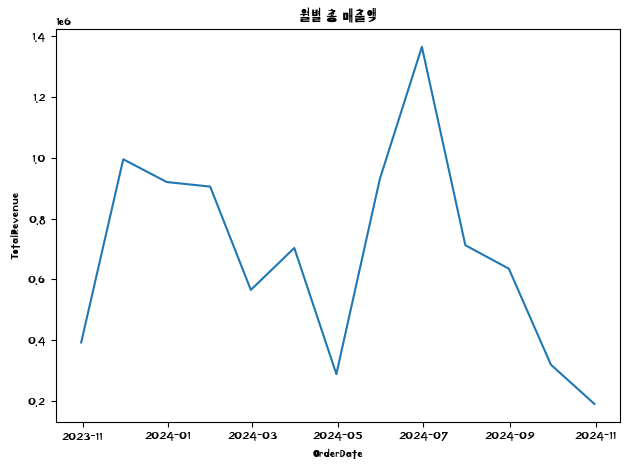

상위 3개 카테고리별 총 매출액:
      Category  TotalRevenue
0         Food       1966000
1  Electronics       1746000
2       Beauty       1493000

상위 5개 국가별 총 매출액:
  Country  TotalRevenue
0      미국       2238000
1      독일       1973000
2      중국       1766000
3      일본       1523000
4    대한민국       1419000


In [73]:
df = pd.read_csv('/Users/uii/eda_practice/data/ecommerce_sales_data.csv', parse_dates=['OrderDate', 'Birthdate'])
df['TotalRevenue'] = df['Quantity'] * df['Price']

df.set_index('OrderDate', inplace=True)
monthly_revenue = df['TotalRevenue'].resample('M').sum()

plt.figure()
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('월별 총 매출액')
plt.xlabel('OrderDate')
plt.ylabel('TotalRevenue')
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

category_revenue = (df.groupby('Category')['TotalRevenue'].sum().nlargest(3).reset_index())
print("상위 3개 카테고리별 총 매출액:")
print(category_revenue)

country_revenue = (df.groupby('Country')['TotalRevenue'].sum().nlargest(5).reset_index())
print("\n상위 5개 국가별 총 매출액:")
print(country_revenue)

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [76]:
customer = (df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(5).reset_index())
print("고객별 총 매출액 상위 5명: ")
print(customer)

order_counts = (df.groupby('CustomerID')['OrderID'].nunique().nlargest(5).reset_index(name='OrderCount'))
print("\n주문 횟수 상위 5명:")
print(order_counts)


today = pd.to_datetime('today')
df['Age'] = ((today - df['Birthdate']).dt.days // 365).astype(int)

bins = [0, 19, 29, 39, 49, df['Age'].max()]
labels = ['<20', '20대', '30대', '40대', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

age_category = (df.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index())

top_category_by_age = age_category.loc[age_category.groupby('AgeGroup')['Quantity'].idxmax()][['AgeGroup', 'Category', 'Quantity']]

print("\n연령대별 가장 많이 구매한 카테고리:")
print(top_category_by_age)

고객별 총 매출액 상위 5명: 
   CustomerID  TotalRevenue
0        1007        334000
1        1354        245000
2        1141        241000
3        1589        215000
4        1632        192000

주문 횟수 상위 5명:
   CustomerID  OrderCount
0        1007           2
1        1038           2
2        1141           2
3        1206           2
4        1278           2

연령대별 가장 많이 구매한 카테고리:
   AgeGroup     Category  Quantity
0       <20       Beauty         0
10      20대         Food        16
16      30대         Food        29
19      40대        Books        26
27      50+  Electronics        28


/var/folders/05/fz3vjf312q31kc1qh7m8p_z40000gn/T/ipykernel_80899/2274985890.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category = (df.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index())
/var/folders/05/fz3vjf312q31kc1qh7m8p_z40000gn/T/ipykernel_80899/2274985890.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_category_by_age = age_category.loc[age_category.groupby('AgeGroup')['Quantity'].idxmax()][['AgeGroup', 'Category', 'Quantity']]


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [79]:
top_products = (df.groupby('Product')['Quantity'].sum().nlargest(5).reset_index())
print("가장 많이 판매된 상위 5개 상품:")
print(top_products)

category_product_sales = (df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index())

category_top = category_product_sales.loc[category_product_sales.groupby('Category')['Quantity'].idxmax()].reset_index(drop=True)

print("\n카테고리별 가장 많이 판매된 상품:")
print(category_top)

avg_quantity = (df.groupby('Product')['Quantity'].mean().nlargest(3).reset_index(name='AvgQuantity'))

print("\n평균 구매 수량이 가장 높은 상위 3개 상품:")
print(avg_quantity)

가장 많이 판매된 상위 5개 상품:
  Product  Quantity
0      셔츠        25
1     립스틱        22
2      소설        21
3     역사책        20
4      커피        20

카테고리별 가장 많이 판매된 상품:
      Category Product  Quantity
0       Beauty     립스틱        22
1        Books      소설        21
2     Clothing      셔츠        25
3  Electronics     노트북        15
4         Food      커피        20
5       Sports    요가매트        12

평균 구매 수량이 가장 높은 상위 3개 상품:
  Product  AvgQuantity
0    자기계발          5.0
1      주스          5.0
2    요가매트          4.0


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

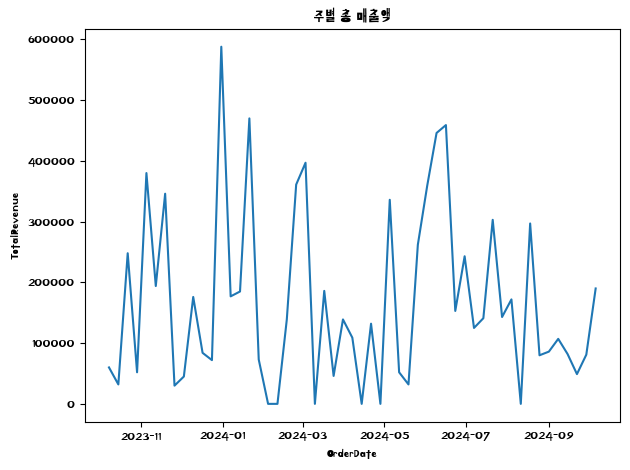

/var/folders/05/fz3vjf312q31kc1qh7m8p_z40000gn/T/ipykernel_80899/1333838651.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  period_revenue = period_df['TotalRevenue'].resample('M').sum()


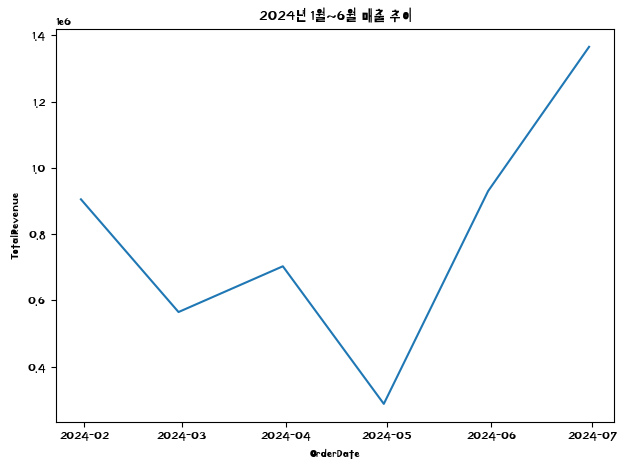

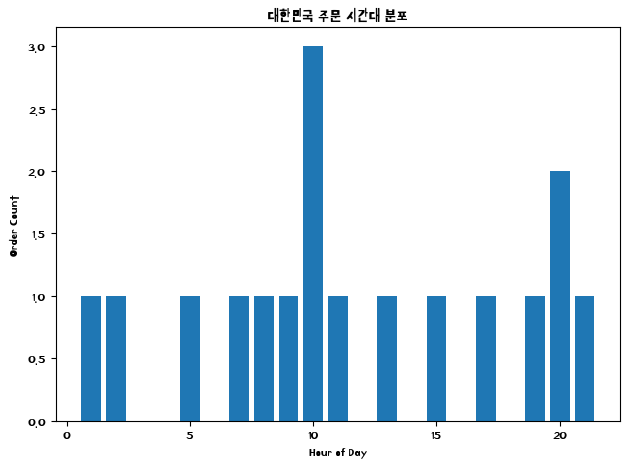

In [83]:
df.set_index('OrderDate', inplace=True)
weekly_revenue = df['TotalRevenue'].resample('W').sum()

plt.figure()
plt.plot(weekly_revenue.index, weekly_revenue.values)
plt.title('주별 총 매출액')
plt.xlabel('OrderDate')
plt.ylabel('TotalRevenue')
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

mask = (df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')
period_df = df.loc[mask].copy()
period_df.set_index('OrderDate', inplace=True)
period_revenue = period_df['TotalRevenue'].resample('M').sum()

plt.figure()
plt.plot(period_revenue.index, period_revenue.values)
plt.title('2024년 1월~6월 매출 추이')
plt.xlabel('OrderDate')
plt.ylabel('TotalRevenue')
plt.tight_layout()
plt.show()

country = '대한민국'
country_df = df[df['Country'] == country].copy()
country_df['Hour'] = country_df['OrderDate'].dt.hour
hour_counts = country_df['Hour'].value_counts().sort_index()

plt.figure()
plt.bar(hour_counts.index, hour_counts.values)
plt.title(f'{country} 주문 시간대 분포')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [84]:
order_counts = df.groupby('CustomerID')['OrderID'].nunique()
num_repeat = (order_counts > 1).sum()
total_customers = order_counts.count()
repeat_rate = num_repeat / total_customers * 100
print(f"재구매를 한 고객 수: {num_repeat}명 (전체 {total_customers}명 중)")
print(f"재구매율: {repeat_rate:.2f}%\n")

df['DiscountedRevenue'] = df['Quantity'] * df['Price'] * (1 - df['DiscountRate'])

category_discount = (df.groupby('Category').agg(avg_discount_rate=('DiscountRate', 'mean'),total_revenue=('TotalRevenue', 'sum'),total_discounted_revenue=('DiscountedRevenue', 'sum')).reset_index())

high_discount_cats = category_discount.nlargest(3, 'avg_discount_rate')

print("평균 할인율이 높은 상위 3개 카테고리:")
print(high_discount_cats[['Category', 'avg_discount_rate', 'total_revenue', 'total_discounted_revenue']])

재구매를 한 고객 수: 9명 (전체 111명 중)
재구매율: 8.11%

평균 할인율이 높은 상위 3개 카테고리:
      Category  avg_discount_rate  total_revenue  total_discounted_revenue
0       Beauty           0.186522        1493000                 1209380.0
5       Sports           0.179444        1057000                  866680.0
3  Electronics           0.175789        1746000                 1453730.0
